# Bayes' Rule Exercises and Monte Carlo Method

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

Text(0, 0.5, 'fractions')

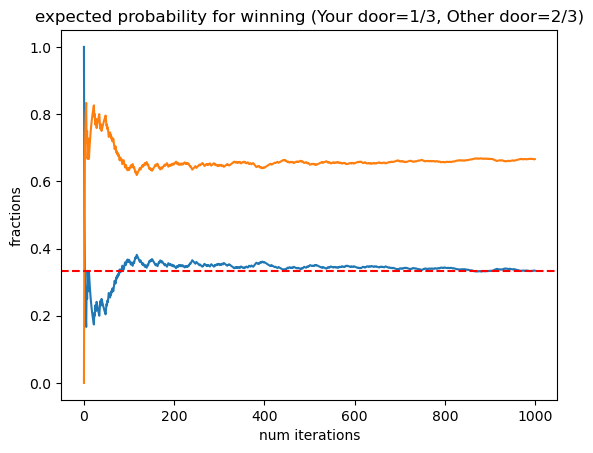

In [97]:
# we have three doors

def monty_hall(num_iterations):

    tot_wins = 0
    Door_A_Win = 0
    Door_Other_Win = 0
    Frac_A_Win = [] 
    Frac_Other_Win = []

    for i in range(num_iterations):

        doors = ['A','B','C']    

        # Participant always chooses Door A
        door_participant = 'A'
        
        # Randomly place the car behind one of the doors
        door_win = random.choice(doors)

        # Host opens a door that is not chosen by the participant and does not have the car
        doors.remove(door_win)
        if(door_win!=door_participant):
            doors.remove(door_participant)

        door_open = random.choice(doors)
        
        if(door_participant==door_win): 
            Door_A_Win+=1

        if(door_participant!=door_win): 
            Door_Other_Win+=1
        
        Frac_A_Win.append(Door_A_Win/(i+1))
        Frac_Other_Win.append(Door_Other_Win/(i+1))
            
    return Frac_A_Win, Frac_Other_Win

num_iterations=1000
Frac_A, Frac_O = monty_hall(num_iterations)

plt.plot(Frac_A)
plt.plot(Frac_O)

plt.title("expected probability for winning (Your door=1/3, Other door=2/3)")

plt.axhline(y=1/3, linestyle='--', color='r')

plt.xlabel('num iterations')

plt.ylabel('fractions')


## Law of Large Numbers

In probability theory, the LLN is a mathematical theorem that states that the average of the results obtained from a large number of independent and identical random samples converges to the true value, if it exists

## Monte Carlo
### Calculate $\pi$ 

In [96]:
# Calculate pi = 3.14... 

In [184]:
def calc_pi(num_iterations):

    n_in_circle = 0 
    n_in_square = 0 
    lis_points = []
    lis_flag = []
    
    for i in range(num_iterations):

        flag_in_circle = False 
        point_in_square = np.random.uniform(-1.,1.,(1,2))

        if(np.sqrt(point_in_square[0][0]**2+point_in_square[0][1]**2)<1): 
            n_in_circle+=1 
            flag_in_circle = True 

        lis_points.append(point_in_square)
        lis_flag.append(flag_in_circle)
    
    n_in_square = float(num_iterations)
    n_in_circle = float(n_in_circle)
    pi = 4.* n_in_circle/n_in_square
    return pi, lis_points, lis_flag

3.128600


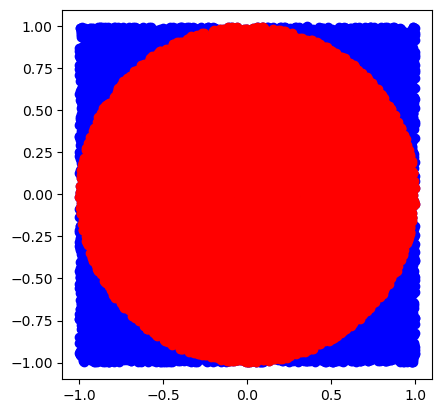

In [229]:
num_iter = 20000
pi, points, flags = calc_pi(num_iter)

print(f"{pi:.6f}")

circle_points = [point for point,m in zip(points, flags) if m==True]

#print(circle_points)

#print(circle_points[:,0])

#plt.scatter(circle_points)

xs = [point[0][0] for point in points]
ys = [point[0][1] for point in points]


xc = [point[0][0] for point in circle_points]
yc = [point[0][1] for point in circle_points]

plt.scatter(xs,ys, color = 'blue')
plt.scatter(xc,yc, color = 'red')
plt.gca().set_aspect('equal', adjustable='box')
